# Analisis Data Listing Airbnb Bangkok

## Latar Belakang

Perusahaan penyewaan dan penginapan rumah berbasis daring asal Amerika Serikat, Airbnb, mencoba untuk menganalisis hasil operasionalnya, terutama di Kota Bangkok, Thailand, yang menjadi kawah candradimuka pariwisata di seantero Asia Tenggara.

### Pernyataan Masalah

Airbnb ingin mengevaluasi performa dan kinerja mitra mereka di Bangkok dengan indikator berupa ulasan yang didapat dan karakteristiknya berdasarkan data yang tersedia.

## Data dan Pembersihannya
Untuk menjawab permasalahan tersebut, langkah yang ditempuh ialah mendapatkan data yang sekiranya bisa diproses dan diolah lebih lanjut, dengan bermodalkan data dalam bentuk character separated values (CSV), yang disertakan pada folder ini dan bersumber dari [link ini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF)

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Set data ini terdiri dari beberapa kolom terkait hunian sewa (*listing*) Airbnb di Bangkok, yang terdiri dari:

* `id` : ID berupa bilangan bulat yang bersifat unik untuk setiap *listing* Airbnb
* `name` : Nama *listing* dalam bentuk *string*
* `host_id` : ID berupa bilangan bulat yang bersifat unik untuk setiap mitra/pengguna
* `host_name` : Nama mitra/pengguna dalam bentuk *string*
* `neighbourhood` : Nama distrik/khet tempat *listing* berada dalam bentuk *string*
* `latitude` : Bilangan desimal yang menunjukkan lintang koordinat hunian sewa
* `longitude` : Bilangan desimal yang menunjukkan bujur koordinat hunian sewa
* `room_type` : *String* yang menujukkan kategorisasi tipe *listing* tersebut yang terdiri dari empat jenis:
    * Shared room (ruang bersama) : Hunian sewa berupa rumah yang bisa dipakai untuk lebih dari satu penyewa pada ruangan yang sama
    * Private room (ruang sendiri) : Hunian sewa berupa rumah yang bisa dipakai untuk lebih dari satu penyewa pada ruangan yang berbeda
    * Entire home/apt (seluruh rumah/apartemen) : Hunian sewa berupa rumah yang hanya bisa dipakai untuk satu penyewa dengan menyewa seutuhnya
    * Hotel room (ruangan hotel) : Hunian sewa berupa kamar hotel pada umumnya
* `price` : Bilangan bulat yang menunjukkan harga sewa hunian
* `minimum_nights` : Bilangan bulat yang menyatakan durasi minimal penyewaan hunian tersebut dalam satuan malam
* `number_of_reviews` : Bilangan bulat yang menyatakan banyaknya ulasan yang didapatkan untuk hunian sewa tersebut
* `last_review` : Tanggal ulasan terakhir yang diberikan pada hunian sewa tersebut
* `reviews_per_month` : Bilangan desimal yang menunjukkan rerata banyaknya ulasan yang didapatkan setiap bulannya
* `calculated_host_listings_count` : Bilangan bulat yang menyatakan jumlah hunian sewa yang dimiliki oleh mitra/pengguna pada daerah tersebut
* `availability_365` : Bilangan bulat yang menyatakan jumlah hari ketersediaan hunian untuk disewa dalam setahun
* `number_of_reviews_ltm` : Bilangan bulat yang menyatakan banyaknya ulasan yang didapatkan untuk hunian sewa tersebut pada 12 bulan terakhir

Berikut tampilan data untuk 5 baris teratas dan 5 baris terbawah untuk set data tersebut dengan keseluruhan terdapat 15.854 baris:

In [186]:
df = pd.read_csv('Airbnb Listings Bangkok.csv', index_col = 0)
display(df)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


### Pemahaman Data

Untuk memudahkan serta menjaga koridor analisis sesuai peruntukannya, langkah selanjutnya yang diambil ialah terlebih dahulu mengenal dan memahami data. Dengan proses ini, anomali yang terdapat pada data bisa diketahui dan akan bisa ditangani pada proses selanjutnya, yakni pembersihan data dengan landasan dan alasan secara statistikal dan berkaitan dengan data yang ditangani juga.

Sebelumnya, info lebih lanjut untuk data perlu ditampilkan, sehingga berikut penjabarannya pada beberapa tampilan di bawah:

In [187]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               10064

None

In [188]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [189]:
pd.set_option('display.max_colwidth', 0)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
df_tabledesc = pd.DataFrame(columns = ['Column Name', 'Number of Unique', 'Unique Sample'], data = listItem)
display(df_tabledesc)

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 b

Ada beberapa poin yang bisa terlihat dari paparan tampilan informasi data di atas, yakni sebagai berikut:
* Dataset tersebut memiliki 16 kolom dan 15.854 baris.
* Beberapa kolom seperti `name`, `host_name`, `last_review` dan `reviews_per_month`, memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data berupa *not a number* (NaN).
* Beberapa kolom seperti `id`, `host_id`, `last_review` (karena sudah terwakili oleh `number_of_reviews` dan `reviews_per_month`) tidak memengaruhi analisis dan juga dalam kasus *dataframe* tunggal ini kolom tersebut tidak memungkinkan untuk diperlukan, sehingga kolom-kolom tersebut bisa dihapus.

### Data Tak Diperlukan

Untuk menghapus beberapa kolom yang dijabarkan di atas, bisa dilakukan *running* kode berikut:

In [190]:
df = df.drop(columns = ['id', 'host_id', 'last_review'])
display(df)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,14,365,0


### Data Hilang

Untuk mengetahui data yang hilang, bisa diperlukan persentase data hilang tersebut dan tampilan keterkaitan antarvariabel yang memengaruhi data yang hilang yang bisa dianalisis berupa tampilan dalam *heatmap* yang bisa diperoleh beberapa tampilan di bawah ini:

In [191]:
display(df.isna().sum()/df.shape[0]*100)

name                              0.050460 
host_name                         0.006308 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

<Axes: >

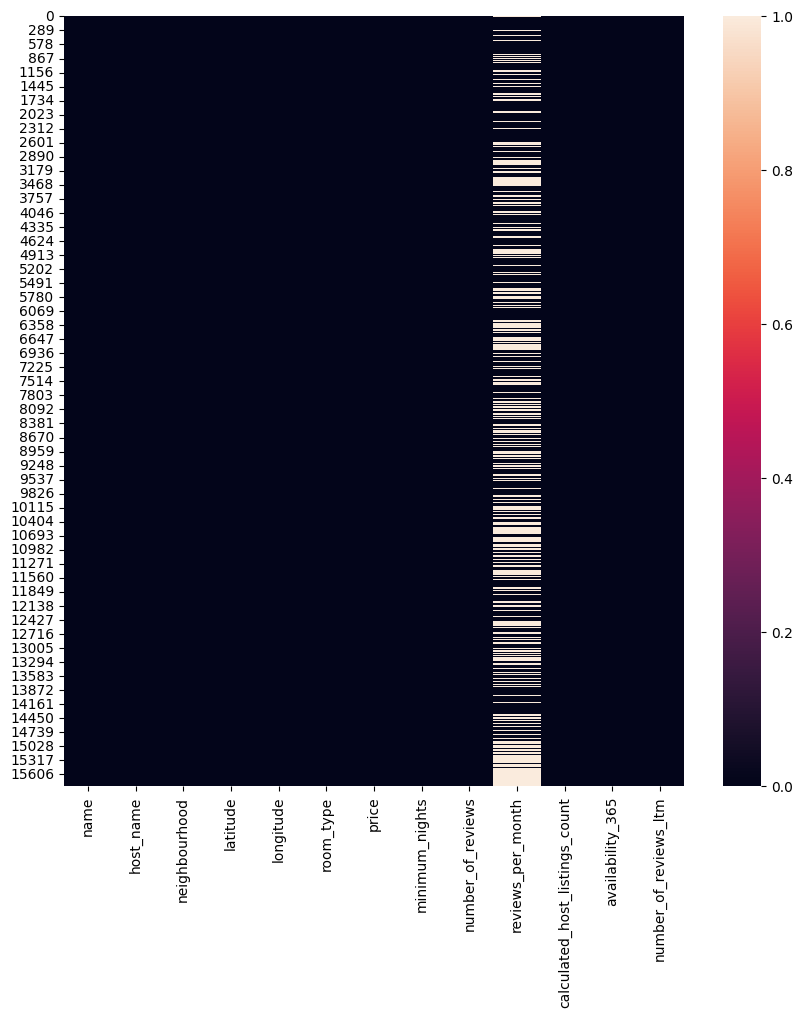

In [192]:
plt.figure(figsize = (10, 10))
sns.heatmap(df[df.columns].isna())

In [193]:
for col in df.columns:
    if (df[df[col].isna()].shape[0] > 0):
        display(f'data hilang pada kolom {col}', df[df[col].isna()])

'data hilang pada kolom name'

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,NaN,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,1,365,0
544,NaN,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,1,365,0
572,NaN,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,1,365,0
669,NaN,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,1,365,0
1030,NaN,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,1,365,0
1282,NaN,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,0.07,1,365,0
1594,NaN,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,1,365,0
2075,NaN,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,0.03,3,220,0


'data hilang pada kolom host_name'

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,Cozy Hideaway,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,0.02,1,365,0


'data hilang pada kolom reviews_per_month'

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,1,365,0
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,3,365,0
7,1 chic bedroom apartment in BKK,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,1,365,0
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,14,365,0


Dengan mempertimbangkan bahwa terdapat data hilang yang tidak acak sama sekali (dua kolom `number_of_reviews` dan `reviews_per_month` sangat berkaitan tergantung banyaknya ulasan, tidak ada ulasan akan memunculkan nilai NaN pada kolom jumlah ulasan per bulan yang disebutkan), serta kolom `name` dan `host_name` tidak memengaruhi analisis inferensial, serta sebisa mungkin data numerik yang akan berpengaruh ingin dipertahankan, Pengisian semua data hilang tersebut menjadi langkah yang terpilih.

Untuk kolom `reviews_per_month`, data hilang pada kolom tersebut bisa langsung diisi dengan 0 mengingat data NaN ini muncul karena tidak ada ulasan yang didapat pada *listing* tersebut dan berikut adalah tampilan sesudah pengisian pada kolom tersebut.

In [194]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
display(df)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0.00,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0


Berikut adalah persentase data yang hilang setelah pengisian pada kolom `reviews_per_month`.

In [195]:
display(df.isna().sum()/df.shape[0]*100)

name                              0.050460
host_name                         0.006308
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

Untuk kolom `name`, data hilang pada kolom tersebut bisa langsung diisi dengan host name pada baris yang sama, mengingat bahwa pada kasus ini data yang hilang bersifat unik dan tidak berhubungan dengan variabel lain, serta pada data yang hilang di kolom ini, kolom `host_name` masih terisi semua. Berikut adalah tampilan sesudah pengisian pada kolom tersebut.

In [196]:
df['name'] = df['name'].fillna(df['host_name'])
display(df)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0.00,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0


Berikut adalah persentase data yang hilang setelah pengisian pada kolom `name`

In [197]:
display(df.isna().sum()/df.shape[0]*100)

name                              0.000000
host_name                         0.006308
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

Untuk kolom `host_name`, hal yang resiprokal dengan kasus di kolom `name` menjadi langkah yang dijalankan. Sata hilang pada kolom tersebut bisa langsung diisi dengan `name` pada baris yang sama, mengingat bahwa pada kasus ini data yang hilang bersifat unik dan tidak berhubungan dengan variabel lain, serta pada data yang hilang di kolom ini, kolom `name` masih terisi semua. Berikut adalah tampilan sesudah pengisian pada kolom tersebut.

In [198]:
df['host_name'] = df['host_name'].fillna(df['name'])
display(df)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0.00,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0


Berikut adalah persentase data yang hilang setelah pengisian pada kolom `host_name`

In [199]:
display(df.isna().sum()/df.shape[0]*100)

name                              0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64